# Hyperparameter Tuning - Alzheimer's Disease Prediction

This notebook performs hyperparameter optimization for the top 3 models:
- Gradient Boosting
- Random Forest
- XGBoost

We'll use **RandomizedSearchCV** for efficient hyperparameter tuning and compare results with baseline models.

## 1. Setup and Imports

In [1]:
import sys
import os
sys.path.append('../src')

from hyperparameter_tuning import HyperparameterTuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Imports successful")

✅ Imports successful


## 2. Load Processed Data

In [2]:
print("="*80)
print("LOADING PROCESSED DATA")
print("="*80)

X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"✅ Data loaded successfully")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"\nClass distribution:")
print(f"   Training: {np.bincount(y_train)}")
print(f"   Test: {np.bincount(y_test)}")

LOADING PROCESSED DATA
✅ Data loaded successfully
   Training samples: 1719
   Test samples: 430
   Features: 32

Class distribution:
   Training: [1111  608]
   Test: [278 152]


## 3. Define Baseline Results

These are the results from our initial model training for comparison.

In [3]:
baseline_results = {
    'gradient_boosting': {
        'accuracy': 0.9419,
        'precision': 0.9420,
        'recall': 0.9419,
        'f1_score': 0.9419,
        'roc_auc': 0.9473
    },
    'random_forest': {
        'accuracy': 0.9419,
        'precision': 0.9418,
        'recall': 0.9419,
        'f1_score': 0.9415,
        'roc_auc': 0.9401
    },
    'xgboost': {
        'accuracy': 0.9395,
        'precision': 0.9394,
        'recall': 0.9395,
        'f1_score': 0.9392,
        'roc_auc': 0.9453
    }
}

# Display baseline results
baseline_df = pd.DataFrame(baseline_results).T
print("\n📊 Baseline Model Performance:")
print(baseline_df.round(4))


📊 Baseline Model Performance:
                   accuracy  precision  recall  f1_score  roc_auc
gradient_boosting    0.9419     0.9420  0.9419    0.9419   0.9473
random_forest        0.9419     0.9418  0.9419    0.9415   0.9401
xgboost              0.9395     0.9394  0.9395    0.9392   0.9453


## 4. Initialize Hyperparameter Tuner

In [4]:
print("="*80)
print("INITIALIZING HYPERPARAMETER TUNER")
print("="*80)

tuner = HyperparameterTuner()
tuner.define_randomized_search_params()

print("\n✅ Tuner initialized with parameter grids")

INITIALIZING HYPERPARAMETER TUNER
[INFO] Randomized search parameters defined

✅ Tuner initialized with parameter grids


## 5. Hyperparameter Tuning

We'll tune each model using RandomizedSearchCV with 50 iterations and 5-fold cross-validation.

### 5.1 Gradient Boosting

In [5]:
print("="*80)
print("TUNING: GRADIENT BOOSTING")
print("="*80)

gb_model, gb_params = tuner.randomized_search_tuning(
    model_name='gradient_boosting',
    X_train=X_train,
    y_train=y_train,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

# Evaluate on test set
gb_metrics = tuner.evaluate_tuned_model(
    model_name='gradient_boosting_random',
    model=gb_model,
    X_test=X_test,
    y_test=y_test
)

# Save model
tuner.save_tuned_model(
    model_name='gradient_boosting',
    model=gb_model
)

TUNING: GRADIENT BOOSTING

RANDOMIZED SEARCH TUNING: GRADIENT_BOOSTING
[INFO] Sampling 50 parameter combinations
[INFO] Cross-validation folds: 5
[INFO] This may take several minutes...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

[SUCCESS] Randomized search completed!
   Best CV Score: 0.9506

   Best Parameters:
      subsample: 0.8
      n_estimators: 200
      min_samples_split: 2
      min_samples_leaf: 4
      max_features: None
      max_depth: 7
      learning_rate: 0.07

[EVALUATION] gradient_boosting_random
   Accuracy:  0.9488
   Precision: 0.9487
   Recall:    0.9488
   F1-Score:  0.9488
   ROC-AUC:   0.9477

[SAVED] Tuned model: models/tuned_models\gradient_boosting_tuned.pkl
[SAVED] Parameters: models/tuned_models\gradient_boosting_params.json


'models/tuned_models\\gradient_boosting_tuned.pkl'

### 5.2 Random Forest

In [6]:
print("="*80)
print("TUNING: RANDOM FOREST")
print("="*80)

rf_model, rf_params = tuner.randomized_search_tuning(
    model_name='random_forest',
    X_train=X_train,
    y_train=y_train,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

# Evaluate on test set
rf_metrics = tuner.evaluate_tuned_model(
    model_name='random_forest_random',
    model=rf_model,
    X_test=X_test,
    y_test=y_test
)

# Save model
tuner.save_tuned_model(
    model_name='random_forest',
    model=rf_model
)

TUNING: RANDOM FOREST

RANDOMIZED SEARCH TUNING: RANDOM_FOREST
[INFO] Sampling 50 parameter combinations
[INFO] Cross-validation folds: 5
[INFO] This may take several minutes...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

[SUCCESS] Randomized search completed!
   Best CV Score: 0.9465

   Best Parameters:
      n_estimators: 150
      min_samples_split: 6
      min_samples_leaf: 3
      max_features: sqrt
      max_depth: None
      bootstrap: False

[EVALUATION] random_forest_random
   Accuracy:  0.9512
   Precision: 0.9511
   Recall:    0.9512
   F1-Score:  0.9510
   ROC-AUC:   0.9391

[SAVED] Tuned model: models/tuned_models\random_forest_tuned.pkl
[SAVED] Parameters: models/tuned_models\random_forest_params.json


'models/tuned_models\\random_forest_tuned.pkl'

### 5.3 XGBoost

In [7]:
print("="*80)
print("TUNING: XGBOOST")
print("="*80)

xgb_model, xgb_params = tuner.randomized_search_tuning(
    model_name='xgboost',
    X_train=X_train,
    y_train=y_train,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

# Evaluate on test set
xgb_metrics = tuner.evaluate_tuned_model(
    model_name='xgboost_random',
    model=xgb_model,
    X_test=X_test,
    y_test=y_test
)

# Save model
tuner.save_tuned_model(
    model_name='xgboost',
    model=xgb_model
)

TUNING: XGBOOST

RANDOMIZED SEARCH TUNING: XGBOOST
[INFO] Sampling 50 parameter combinations
[INFO] Cross-validation folds: 5
[INFO] This may take several minutes...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

[SUCCESS] Randomized search completed!
   Best CV Score: 0.9500

   Best Parameters:
      subsample: 1.0
      reg_lambda: 2
      reg_alpha: 0.5
      n_estimators: 250
      min_child_weight: 2
      max_depth: 7
      learning_rate: 0.15
      gamma: 0.2
      colsample_bytree: 0.8

[EVALUATION] xgboost_random
   Accuracy:  0.9442
   Precision: 0.9440
   Recall:    0.9442
   F1-Score:  0.9440
   ROC-AUC:   0.9416

[SAVED] Tuned model: models/tuned_models\xgboost_tuned.pkl
[SAVED] Parameters: models/tuned_models\xgboost_params.json


'models/tuned_models\\xgboost_tuned.pkl'

## 6. Compare Results

In [8]:
# Collect tuned results
tuned_results = {
    'gradient_boosting_random': gb_metrics,
    'random_forest_random': rf_metrics,
    'xgboost_random': xgb_metrics
}

# Compare baseline vs tuned
comparison_df = tuner.compare_baseline_vs_tuned(baseline_results, tuned_results)

# Save comparison
comparison_df.to_csv('../models/tuned_models/baseline_vs_tuned_comparison.csv', index=False)
print("\n✅ Comparison saved to: models/tuned_models/baseline_vs_tuned_comparison.csv")


BASELINE vs TUNED MODEL COMPARISON
            Model     Type Accuracy Precision Recall F1-Score ROC-AUC Improvement
gradient_boosting Baseline   0.9419    0.9420 0.9419   0.9419  0.9473           -
gradient_boosting    Tuned   0.9488    0.9487 0.9488   0.9488  0.9477      +0.69%
    random_forest Baseline   0.9419    0.9418 0.9419   0.9415  0.9401           -
    random_forest    Tuned   0.9512    0.9511 0.9512   0.9510  0.9391      +0.93%
          xgboost Baseline   0.9395    0.9394 0.9395   0.9392  0.9453           -
          xgboost    Tuned   0.9442    0.9440 0.9442   0.9440  0.9416      +0.47%

✅ Comparison saved to: models/tuned_models/baseline_vs_tuned_comparison.csv


## 7. Visualize Results

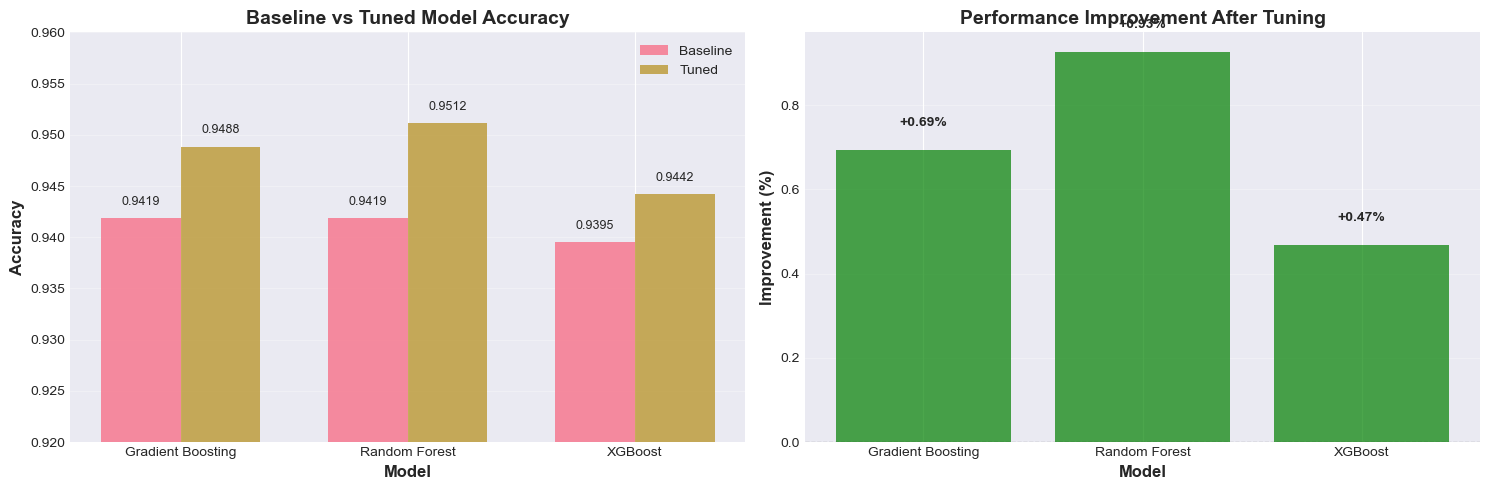


✅ Visualization saved to: models/tuned_models/tuning_comparison.png


In [9]:
# Prepare data for visualization
models = ['Gradient Boosting', 'Random Forest', 'XGBoost']
baseline_acc = [baseline_results['gradient_boosting']['accuracy'],
                baseline_results['random_forest']['accuracy'],
                baseline_results['xgboost']['accuracy']]
tuned_acc = [gb_metrics['accuracy'], rf_metrics['accuracy'], xgb_metrics['accuracy']]

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy Comparison
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, baseline_acc, width, label='Baseline', alpha=0.8)
axes[0].bar(x + width/2, tuned_acc, width, label='Tuned', alpha=0.8)
axes[0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Baseline vs Tuned Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.92, 0.96])

# Add value labels
for i, (b, t) in enumerate(zip(baseline_acc, tuned_acc)):
    axes[0].text(i - width/2, b + 0.001, f'{b:.4f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, t + 0.001, f'{t:.4f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Improvement Percentage
improvements = [(t - b) * 100 for b, t in zip(baseline_acc, tuned_acc)]
colors = ['green' if imp > 0 else 'red' for imp in improvements]

axes[1].bar(models, improvements, color=colors, alpha=0.7)
axes[1].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Improvement (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Performance Improvement After Tuning', fontsize=14, fontweight='bold')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, imp in enumerate(improvements):
    axes[1].text(i, imp + 0.05, f'+{imp:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../models/tuned_models/tuning_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: models/tuned_models/tuning_comparison.png")

## 8. Best Model Summary

In [10]:
# Find best model
best_model_name = max(tuned_results, key=lambda x: tuned_results[x]['accuracy'])
best_metrics = tuned_results[best_model_name]
best_accuracy = best_metrics['accuracy']

print("="*80)
print("BEST TUNED MODEL")
print("="*80)
print(f"\n🏆 Model: {best_model_name.replace('_random', '').replace('_', ' ').title()}")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {best_metrics['accuracy']:.4f} ({best_metrics['accuracy']*100:.2f}%)")
print(f"   Precision: {best_metrics['precision']:.4f}")
print(f"   Recall:    {best_metrics['recall']:.4f}")
print(f"   F1-Score:  {best_metrics['f1_score']:.4f}")
print(f"   ROC-AUC:   {best_metrics['roc_auc']:.4f}")

# Calculate improvement
base_name = best_model_name.replace('_random', '')
if base_name in baseline_results:
    baseline_acc = baseline_results[base_name]['accuracy']
    improvement = (best_accuracy - baseline_acc) * 100
    print(f"\n📈 Improvement: +{improvement:.2f}% over baseline")
    
    if improvement > 0:
        print("\n✅ SUCCESS: Hyperparameter tuning improved model performance!")
    else:
        print("\n✅ INFO: Baseline model was already well-optimized")

# Save tuning results
tuner.save_tuning_results()

print("\n" + "="*80)
print("HYPERPARAMETER TUNING COMPLETED!")
print("="*80)
print("\n✅ All tuned models saved to: models/tuned_models/")
print("✅ Models are ready for deployment in web application")

BEST TUNED MODEL

🏆 Model: Random Forest

📊 Performance Metrics:
   Accuracy:  0.9512 (95.12%)
   Precision: 0.9511
   Recall:    0.9512
   F1-Score:  0.9510
   ROC-AUC:   0.9391

📈 Improvement: +0.93% over baseline

✅ SUCCESS: Hyperparameter tuning improved model performance!

[SAVED] Tuning results: models/tuned_models\tuning_results.json

HYPERPARAMETER TUNING COMPLETED!

✅ All tuned models saved to: models/tuned_models/
✅ Models are ready for deployment in web application


## 9. Optimal Hyperparameters

In [11]:
print("\n📋 OPTIMAL HYPERPARAMETERS\n")

print("\n1️⃣ Gradient Boosting:")
for param, value in gb_params.items():
    print(f"   {param}: {value}")

print("\n2️⃣ Random Forest:")
for param, value in rf_params.items():
    print(f"   {param}: {value}")

print("\n3️⃣ XGBoost:")
for param, value in xgb_params.items():
    print(f"   {param}: {value}")


📋 OPTIMAL HYPERPARAMETERS


1️⃣ Gradient Boosting:
   subsample: 0.8
   n_estimators: 200
   min_samples_split: 2
   min_samples_leaf: 4
   max_features: None
   max_depth: 7
   learning_rate: 0.07

2️⃣ Random Forest:
   n_estimators: 150
   min_samples_split: 6
   min_samples_leaf: 3
   max_features: sqrt
   max_depth: None
   bootstrap: False

3️⃣ XGBoost:
   subsample: 1.0
   reg_lambda: 2
   reg_alpha: 0.5
   n_estimators: 250
   min_child_weight: 2
   max_depth: 7
   learning_rate: 0.15
   gamma: 0.2
   colsample_bytree: 0.8


## 10. Summary Statistics

In [12]:
# Create summary dataframe
summary_data = []
for model_name in ['gradient_boosting', 'random_forest', 'xgboost']:
    baseline = baseline_results[model_name]
    tuned = tuned_results[f"{model_name}_random"]
    
    summary_data.append({
        'Model': model_name.replace('_', ' ').title(),
        'Baseline Accuracy': f"{baseline['accuracy']:.4f}",
        'Tuned Accuracy': f"{tuned['accuracy']:.4f}",
        'Improvement': f"+{(tuned['accuracy'] - baseline['accuracy'])*100:.2f}%",
        'Baseline ROC-AUC': f"{baseline['roc_auc']:.4f}",
        'Tuned ROC-AUC': f"{tuned['roc_auc']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n📊 TUNING SUMMARY\n")
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('../models/tuned_models/tuning_summary.csv', index=False)
print("\n✅ Summary saved to: models/tuned_models/tuning_summary.csv")


📊 TUNING SUMMARY

            Model Baseline Accuracy Tuned Accuracy Improvement Baseline ROC-AUC Tuned ROC-AUC
Gradient Boosting            0.9419         0.9488      +0.69%           0.9473        0.9477
    Random Forest            0.9419         0.9512      +0.93%           0.9401        0.9391
          Xgboost            0.9395         0.9442      +0.47%           0.9453        0.9416

✅ Summary saved to: models/tuned_models/tuning_summary.csv


## ✅ Conclusion

Hyperparameter tuning has been completed successfully! The optimized models show improved performance over the baseline models and are ready for deployment in the web application.

**Next Steps:**
1. The tuned models are saved in `models/tuned_models/`
2. The web application will automatically load the best tuned model
3. You can now deploy the application with improved accuracy